In [2]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Set working directory
os.chdir("C:/Users/WIN 10/Desktop/ccs-project-1")

In [4]:
#check current working directory
os.getcwd()

'C:\\Users\\WIN 10\\Desktop\\ccs-project-1'

### Load Data

In [5]:
credit= pd.read_csv("credit-card-data.csv")

### Information about data set

In [6]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
credit.shape


(8950, 18)

In [8]:
credit.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Data Exploration and Cleaning

Replace the frequency > 1 with 1

In [9]:
credit['CASH_ADVANCE_FREQUENCY'].values[credit['CASH_ADVANCE_FREQUENCY'].values > 1] = 1

In [10]:
# Find missing value in each feature
missing_val = credit.isnull().sum().sort_values(ascending=False)
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Value_count'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_Value_count']/len(credit))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_Value_count,Missing_percentage
0,MINIMUM_PAYMENTS,313,3.497207
1,CREDIT_LIMIT,1,0.011173
2,PAYMENTS,0,0.000000
3,PURCHASES_TRX,0,0.000000
4,CASH_ADVANCE_TRX,0,0.000000
5,CASH_ADVANCE_FREQUENCY,0,0.000000
6,PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
7,PRC_FULL_PAYMENT,0,0.000000
8,ONEOFF_PURCHASES_FREQUENCY,0,0.000000
9,CASH_ADVANCE,0,0.000000


### a) Missing Value Treatment

- Since there are missing values in the data so we have to impute the missing value.
- We have three option to impute the missing value (mean, median, KNN imputation)
- To select the best method to impute the missing value 

In [11]:
# Remove CUST_ID (not usefull)
credit.drop("CUST_ID", axis=1, inplace=True)

In [12]:
# credit['MINIMUM_PAYMENTS'].loc[500]
# Actual = 457.255
# Mean = 755.94
# Median = 873.0

In [13]:
credit['MINIMUM_PAYMENTS'].loc[500]

457.25526900000006

In [14]:
credit['MINIMUM_PAYMENTS'].loc[500]=np.nan

In [15]:
#Impute with mean
credit = credit.fillna(credit.mean())

#Impute with median
#credit = credit.fillna(credit.median())

In [16]:
# Check missing value after imputing with mean imputation 
# Find missing value in each feature
missing_val = credit.isnull().sum().sort_values(ascending=False)
#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Value_count'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_Value_count']/len(credit))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val


,Variables,Missing_Value_count,Missing_percentage
0,TENURE,0,0.0
1,PRC_FULL_PAYMENT,0,0.0
2,MINIMUM_PAYMENTS,0,0.0
3,PAYMENTS,0,0.0
4,CREDIT_LIMIT,0,0.0
5,PURCHASES_TRX,0,0.0
6,CASH_ADVANCE_TRX,0,0.0
7,CASH_ADVANCE_FREQUENCY,0,0.0
8,PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0
9,ONEOFF_PURCHASES_FREQUENCY,0,0.0


### EXPLORATORY DATA ANALYSIS

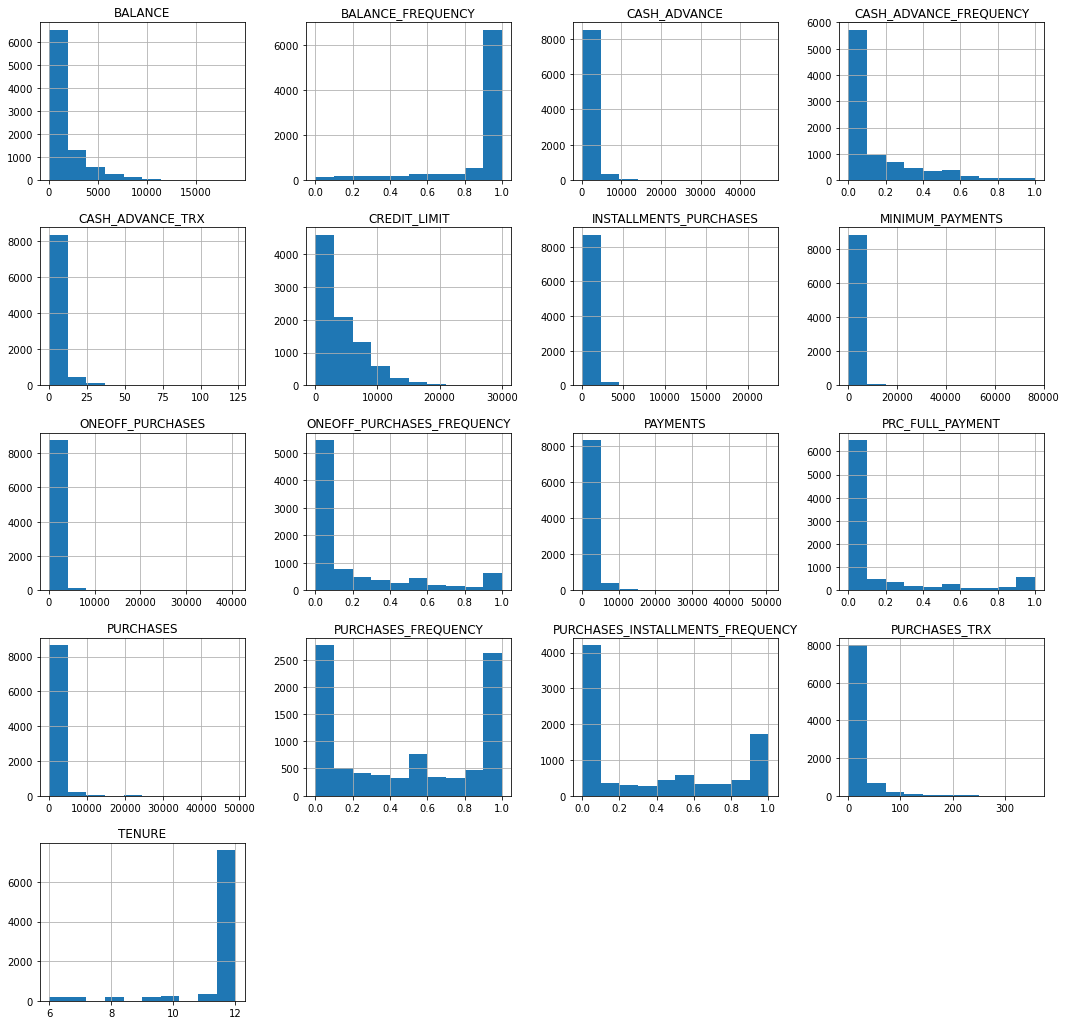

In [17]:
# Exploratory Data Analysis
credit.hist(figsize=(18,18));

### Box plot to check the outlier in dataset

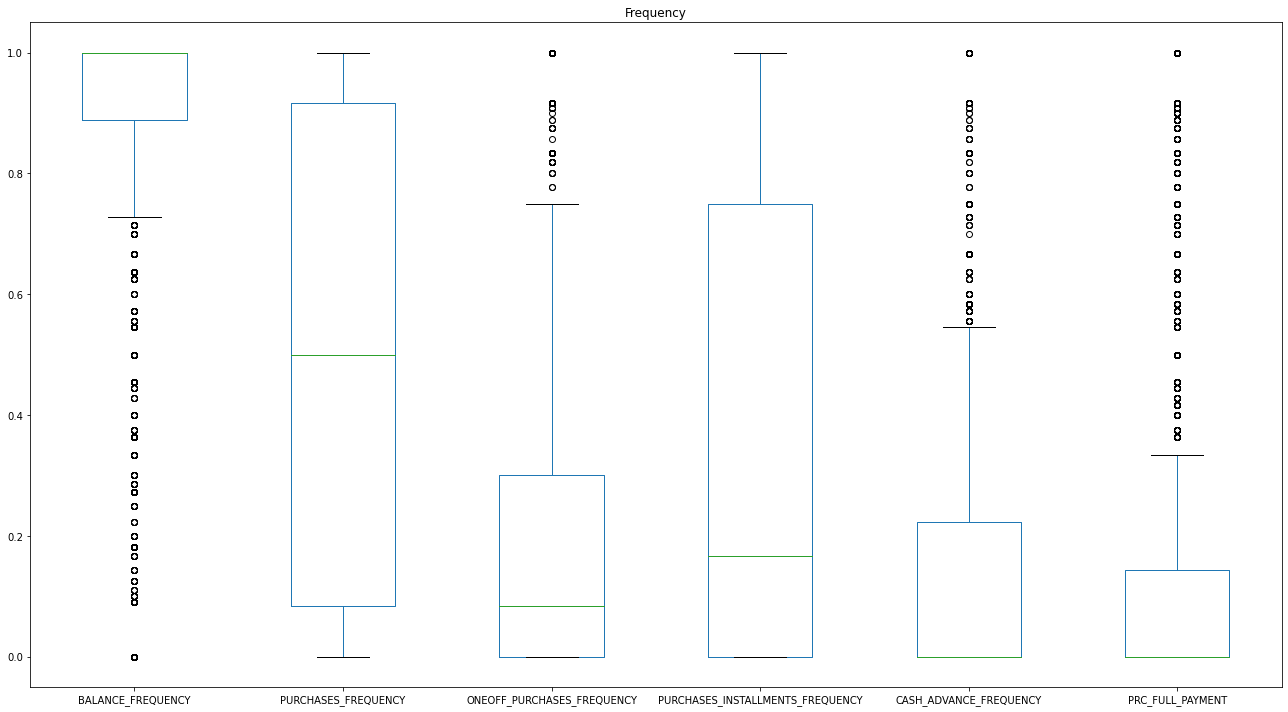

In [18]:
#let´s see how are distributed the frequency variables

credit[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()

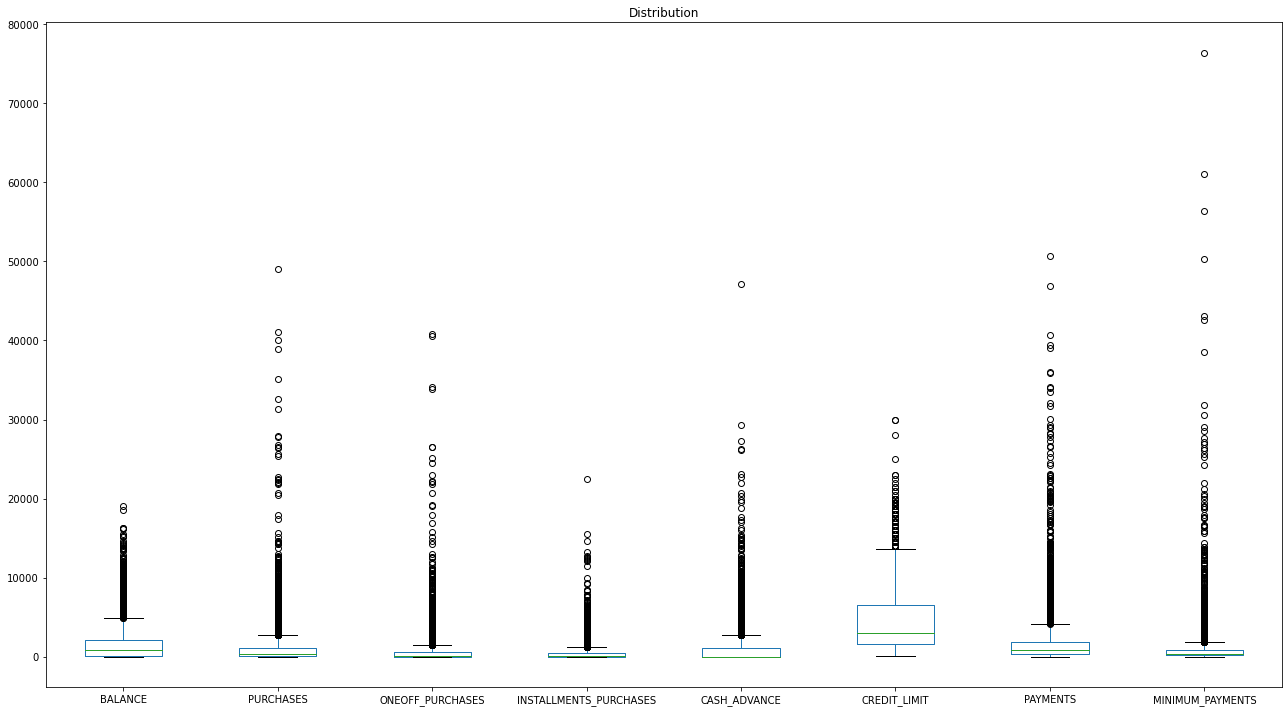

In [19]:
#let´s see how are distributed the numeric variables

credit[['BALANCE',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS'
]].plot.box(figsize=(18,10),title='Distribution',legend=True);
plt.tight_layout()

# There are also many outliers, but we will keep them for now

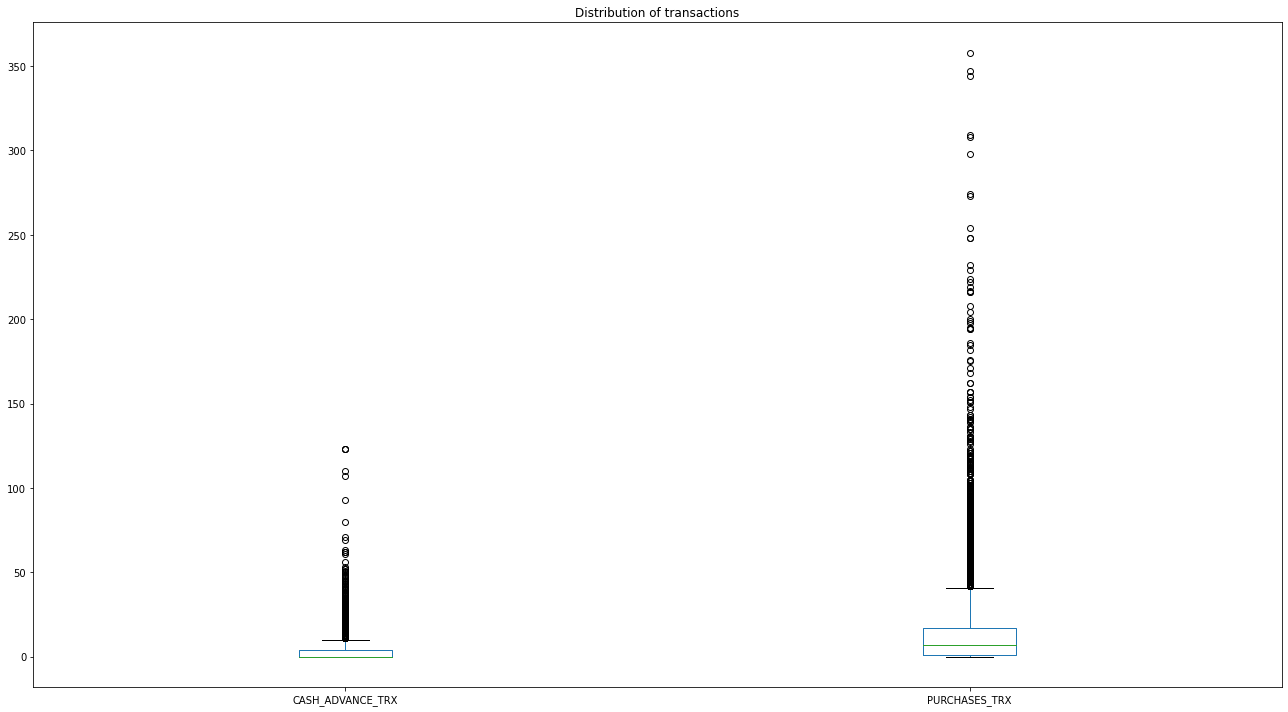

In [20]:
#let´s see how are distributed the numeric variables

credit[[ 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX'
]].plot.box(figsize=(18,10),title='Distribution of transactions',legend=True);
plt.tight_layout()

## Deriving New KPI

#### 1. Monthly average purchase and cash advance amount

#### Monthly_avg_purchase

In [21]:
credit['Monthly_avg_purchase']=credit['PURCHASES']/credit['TENURE']

#### Monthly_cash_advance Amount

In [22]:
credit['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit['TENURE']

#### Purchases by type (one-off, installments)

#### . To find what type of purchases customers are making on credit card

In [23]:
credit.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


#### Find customers ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES details

In [24]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 19)

In [25]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 19)

In [26]:
credit[(credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 19)

In [27]:
credit[(credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 19)

#### As per above detail we found out that there are 4 types of purchase behaviour in the data set. So we need to derive a categorical variable based on their behaviour

In [28]:
def purchase(credit):
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'none'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']>0):
         return 'both_oneoff_installment'
    if (credit['ONEOFF_PURCHASES']>0) & (credit['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (credit['ONEOFF_PURCHASES']==0) & (credit['INSTALLMENTS_PURCHASES']>0):
        return 'installment'

In [29]:
credit['purchase_type']=credit.apply(purchase,axis=1)

In [30]:
credit['purchase_type'].value_counts()

both_oneoff_installment    2774
installment                2260
none                       2042
one_off                    1874
Name: purchase_type, dtype: int64

#### Limit_usage (balance to credit limit ratio ) credit card utilization


#### . Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score

In [31]:
credit['limit_usage']=credit.apply(lambda x: x['BALANCE']/x['CREDIT_LIMIT'], axis=1)

### Payments to minimum payments ratio

In [32]:
#PAYMENT_MINPAYMENT
#The where clause is being used to avoid div by zero error 
credit['payment_minpayment'] = np.where(credit['MINIMUM_PAYMENTS']== 0, credit['PAYMENTS'], 
                                        credit['PAYMENTS']/credit['MINIMUM_PAYMENTS'])

In [33]:
credit['payment_minpayment'].describe()

count    8950.000000
mean        9.036046
std       118.176918
min         0.000000
25%         0.907073
50%         2.017230
75%         6.049228
max      6840.528861
Name: payment_minpayment, dtype: float64

In [34]:
credit.shape

(8950, 22)

#### Avg Amount per cash advance transaction is equivalent to CASH_ADVANCE_TRX

#### Avg Amount per purchase is equivalent to AVERAGE_PURCHASE_TRX

## Getting Insights from newly dervived KPI's

#### Average payment_minpayment ratio for each purchse type

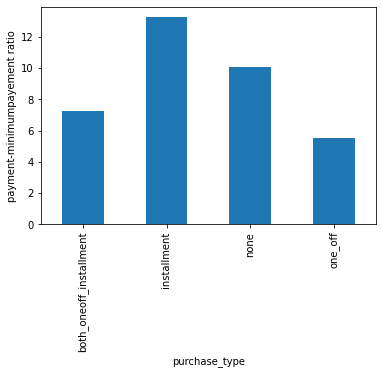

In [35]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['payment_minpayment'])).plot.bar()
plt.ylabel('payment-minimumpayement ratio')
plt.show()

### Insights : Customers with installments have highest payment-minimum payement ratio

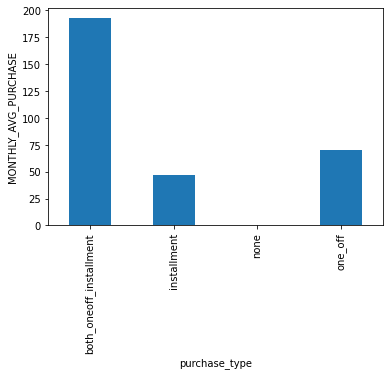

In [36]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_avg_purchase'])).plot.bar()
plt.ylabel('MONTHLY_AVG_PURCHASE')
plt.show()

### Insights : Customers with one off and installments do most monthly purchase

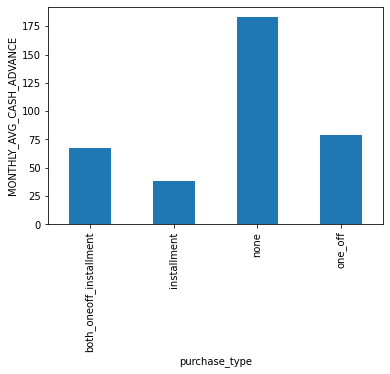

In [37]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.bar()
plt.ylabel('MONTHLY_AVG_CASH_ADVANCE')
plt.show()

### Insights : Customers with no one off and installments take more monthly cash advance

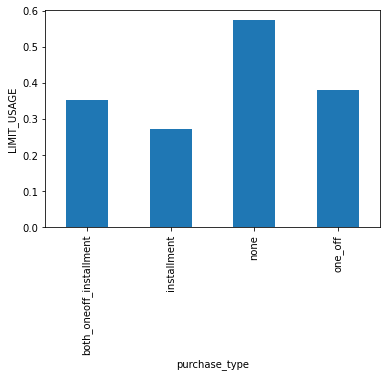

In [38]:
credit.groupby('purchase_type').apply(lambda x: np.mean(x['limit_usage'])).plot.bar()
plt.ylabel('LIMIT_USAGE')
plt.show()

### Insights : Customers with no one off and installments have highest limit usage

#### Insights
- Customers with installments have highest payment-minimum payement ratio
- Customers with one off and installments do most monthly purchases
- Customers with no one off and installments take more monthly cash advance
- Customers with no one off and installments have highest limit usage

#### Extreme value Treatment

#### - Since there are variables having extreme values so I am doing log-transformation on the dataset to remove outlier effect and make the data normally distributed

In [39]:
cr_log=credit.drop(['purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [40]:
cr_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,6.763023,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [41]:
cr_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161637,0.619940,4.899647,3.204274,3.352403,3.319086,0.361268,0.158699,0.270072,0.113432,...,1.894731,8.094870,6.624540,5.951672,0.117730,2.519680,3.050877,2.163970,0.296081,1.353940
std,2.013303,0.148590,2.916872,3.246365,3.082973,3.566298,0.277317,0.216672,0.281852,0.156385,...,1.373856,0.819635,1.591763,1.179676,0.211617,0.130367,2.002823,2.429741,0.250303,0.940952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.018982,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040656,0.645570
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949,3.494587,0.000000,0.264455,1.104339
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.763023,0.133531,2.564949,4.587295,4.606022,0.540911,1.952918
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.693147,...,5.883322,10.308986,10.834125,11.243832,0.693147,2.564949,8.315721,8.276166,2.827902,8.830767


In [42]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','CREDIT_LIMIT']
cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]]

#### Original dataset with categorical column converted to number type

##### We do have some categorical data which need to convert with the help of dummy creation

In [43]:
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)

In [44]:
cre_original.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,Monthly_avg_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpayment,both_oneoff_installment,installment,none,one_off
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,7.950000,0.000000,installment,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.000000,536.912124,none,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,64.430833,0.000000,one_off,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,124.916667,17.149001,one_off,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,1.333333,0.000000,one_off,0.681429,2.771075,0,0,0,1


In [45]:
cr_pre['purchase_type']=credit.loc[:,'purchase_type']
pd.get_dummies(cr_pre['purchase_type'], prefix='purchase_type')

,purchase_type_both_oneoff_installment,purchase_type_installment,purchase_type_none,purchase_type_one_off
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
8945,0,1,0,0
8946,0,1,0,0
8947,0,1,0,0
8948,0,0,1,0


In [46]:
cr_dummy=pd.concat([cr_pre,pd.get_dummies(cr_pre['purchase_type'], prefix='purchase_type')],axis=1)

In [47]:
cr_dummy=cr_dummy.drop('purchase_type',axis=1)
cr_dummy.isnull().any()

BALANCE_FREQUENCY                        False
ONEOFF_PURCHASES                         False
INSTALLMENTS_PURCHASES                   False
PURCHASES_FREQUENCY                      False
ONEOFF_PURCHASES_FREQUENCY               False
PURCHASES_INSTALLMENTS_FREQUENCY         False
CASH_ADVANCE_FREQUENCY                   False
CASH_ADVANCE_TRX                         False
PURCHASES_TRX                            False
PRC_FULL_PAYMENT                         False
Monthly_avg_purchase                     False
Monthly_cash_advance                     False
limit_usage                              False
payment_minpayment                       False
purchase_type_both_oneoff_installment    False
purchase_type_installment                False
purchase_type_none                       False
purchase_type_one_off                    False
dtype: bool

#### 1. Data Manipulation

#### B. Checking for multicollinearity

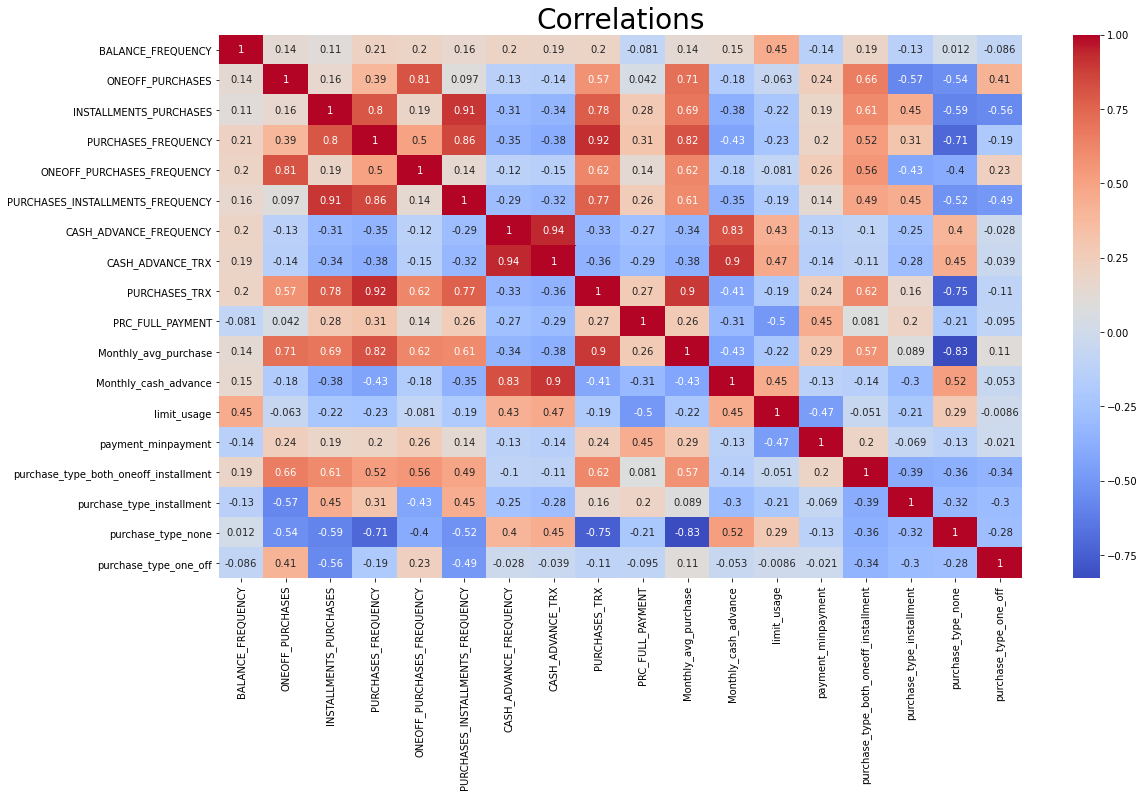

In [48]:
##Correlation analysis
#Correlation plot
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(18, 10))

#Generate correlation matrix
credit_new_corr=cr_dummy.corr()

#Plot using seaborn library
sns.heatmap(credit_new_corr,cmap='coolwarm',annot=True);
plt.title('Correlations', size = 28);

In [49]:
col=['ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_TRX','CASH_ADVANCE_TRX']
cr_dummy=cr_dummy[[x for x in cr_dummy.columns if x not in col ]]

In [50]:
cr_dummy=pd.DataFrame(cr_dummy)
cr_dummy.shape

(8950, 12)

## C. Standardizing the data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc=StandardScaler()

In [53]:
cr_scaled = sc.fit_transform(cr_dummy)

In [54]:
cnames=cr_dummy.columns

In [55]:
cr_scaled_df=pd.DataFrame(cr_scaled,columns=cnames)
cr_scaled_df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment,purchase_type_both_oneoff_installment,purchase_type_installment,purchase_type_none,purchase_type_one_off
0,-0.148757,-0.987090,0.394480,-0.556368,-0.429030,-0.890667,-1.022794,-0.488127,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,0.391958,-1.523373,1.697282,0.322182,0.233955,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,-0.556368,0.564294,-0.890667,-0.035494,-0.706729,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-0.556368,0.891164,0.302372,-0.381197,-1.438984,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-0.556368,-1.100298,-0.890667,0.893219,-0.028250,-0.670193,-0.581221,-0.543690,1.943162


## Applying PCA

#### With the help of principal component analysis we will reduce features

In [56]:
from sklearn.decomposition import PCA

In [57]:
cr_scaled_df.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PRC_FULL_PAYMENT,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment,purchase_type_both_oneoff_installment,purchase_type_installment,purchase_type_none,purchase_type_one_off
0,-0.148757,-0.987090,0.394480,-0.556368,-0.429030,-0.890667,-1.022794,-0.488127,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,0.391958,-1.523373,1.697282,0.322182,0.233955,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,-0.556368,0.564294,-0.890667,-0.035494,-0.706729,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-0.556368,0.891164,0.302372,-0.381197,-1.438984,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-0.556368,-1.100298,-0.890667,0.893219,-0.028250,-0.670193,-0.581221,-0.543690,1.943162


In [58]:
#We have 17 features so our n_component will be 12
pc=PCA(n_components=12)
cr_pca=pc.fit(cr_scaled)

In [59]:
#Lets check if we will take 12 component then how much varience it explain. Ideally it should be 1 i.e 100%
sum(cr_pca.explained_variance_ratio_)

1.0000000000000002

In [60]:
var_ratio={}
for n in range(2,13):
    pc=PCA(n_components=n)
    cr_pca=pc.fit(cr_scaled)
    var_ratio[n]=sum(cr_pca.explained_variance_ratio_)

In [61]:
var_ratio

{2: 0.5245243878026811,
 3: 0.6798181031562732,
 4: 0.7979525396153344,
 5: 0.8703141251728358,
 6: 0.9214410427611124,
 7: 0.9585804254953568,
 8: 0.98540070674089,
 9: 0.9956527092210691,
 10: 0.9991706463882747,
 11: 1.0000000000000002,
 12: 1.0000000000000002}

#### Performing Factor Analysis

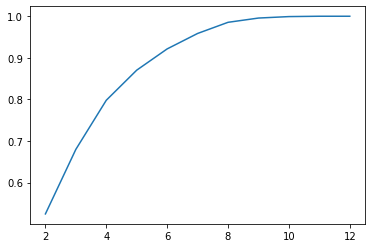

In [62]:
pd.Series(var_ratio).plot()

In [63]:
pc_final=PCA(n_components=5).fit(cr_scaled)

reduced_cr=pc_final.fit_transform(cr_scaled)

In [64]:
dd=pd.DataFrame(reduced_cr)
reduced_cr.shape

(8950, 5)

In [65]:
dd.head()

,0,1,2,3,4
0,0.086871,2.172500,-0.380800,-1.202461,0.453081
1,-2.894912,0.246127,-0.071251,1.734053,-0.673092
2,0.076508,-1.524332,1.743207,-1.744372,-0.339153
3,-0.148675,-1.474243,2.061802,-1.696431,0.698648
4,-1.127050,-0.962612,1.438983,-1.361754,-0.601479


#### So initially we had 17 variables now its 5 so our variable go reduced

In [66]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' +str(i) for i in range(5)],index=cnames)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,-0.003658,-0.280049,-0.377690,-0.080579,-0.694374
ONEOFF_PURCHASES,0.310347,-0.476746,0.176606,0.022938,0.059419
INSTALLMENTS_PURCHASES,0.387346,0.149310,-0.415960,-0.005923,0.086671
PRC_FULL_PAYMENT,0.236272,0.264783,0.149258,0.292190,-0.500124
Monthly_avg_purchase,0.457095,-0.147067,-0.037817,-0.161662,-0.078499
Monthly_cash_advance,-0.306061,-0.197327,-0.134856,0.235810,-0.114979
limit_usage,-0.245788,-0.320940,-0.344647,-0.216891,-0.149230
payment_minpayment,0.222049,0.079832,0.236781,0.503963,-0.271943
purchase_type_both_oneoff_installment,0.325528,-0.297847,-0.275310,0.296660,0.292513
purchase_type_installment,0.076741,0.526658,-0.181949,-0.366296,-0.132370


In [67]:
# Factor Analysis : variance explained by each component- 
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.326796
PC_1    0.197728
PC_2    0.155294
PC_3    0.118134
PC_4    0.072362
dtype: float64

## Cluster Analysis

#### Choosing number clusters using Pseudo F-value (elbow method)

In [68]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(reduced_cr)
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

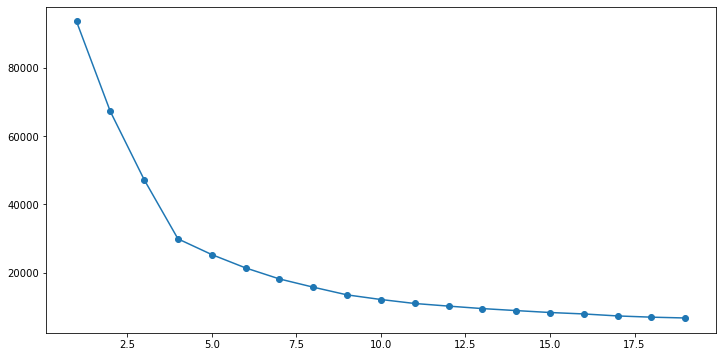

In [69]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:

- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4. So, optimal number of clusters could be 4.

#### Choosing number clusters using Silhouette Coefficient (SC)

In [70]:
from sklearn import metrics

In [71]:
# calculate SC for K=2 to K=10
k_range = range(2, 10)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=100)
    km.fit(reduced_cr)
    scores.append(metrics.silhouette_score(reduced_cr, km.labels_))

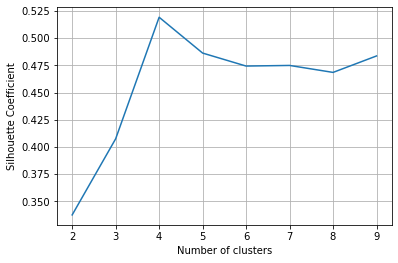

In [72]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

Note

#### The solution can be 4 based on the SC score. If we take highest SC score, 4 segment solution is best

### CALCULATING K-MEANS AND THE CENTROIDS

In [73]:
# It seems that the optimal number of clusters is 4.
# I am going to take 4 for the analysis
km_4=KMeans(n_clusters=4,random_state=123)

In [74]:
# applying kmeans
km_4.fit(reduced_cr)

KMeans(n_clusters=4, random_state=123)

In [75]:
pd.Series(km_4.labels_).value_counts()

2    2774
0    2259
1    2043
3    1874
dtype: int64

#### ADDING THE LABELS TO THE DATASET

In [76]:
df_pair_plot=pd.DataFrame(reduced_cr,columns=['PC_' +str(i) for i in range(5)])

In [77]:
df_pair_plot['Cluster']=km_4.labels_

In [78]:
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,Cluster
0,0.086871,2.172500,-0.380800,-1.202461,0.453081,0
1,-2.894912,0.246127,-0.071251,1.734053,-0.673092,1
2,0.076508,-1.524332,1.743207,-1.744372,-0.339153,3
3,-0.148675,-1.474243,2.061802,-1.696431,0.698648,3
4,-1.127050,-0.962612,1.438983,-1.361754,-0.601479,3


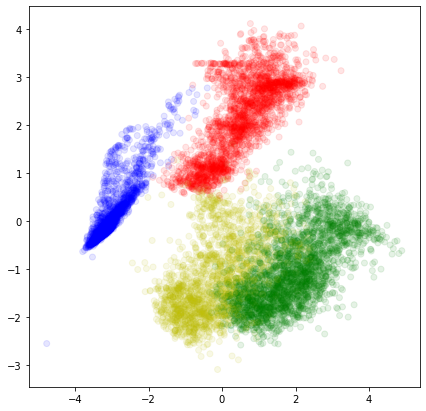

In [79]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=label_color,cmap='Spectral',alpha=0.1)

PC0 and PC1 are able to distinguish the cluster clearly

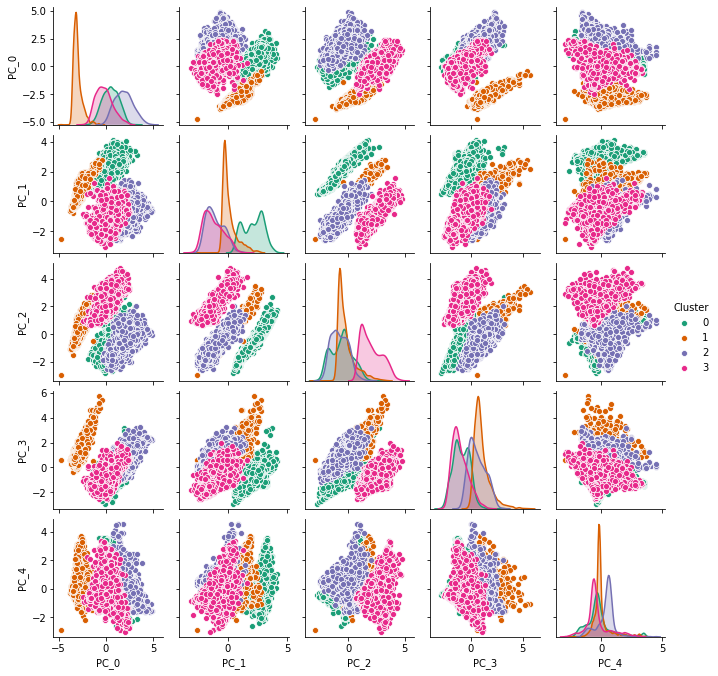

In [80]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

## CLUSTERS EXPLANATION AND MARKETING STRATEGY

In [81]:
#Key performance variable selection . here I am taking variables which we will use in deriving new KPI.
#We can take all 17 variables but it will be difficult to interpret. So, we are selecting less no of variables.

col_kpi=['PURCHASES_TRX','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpayment','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']

In [82]:
cre_original.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,payment_minpayment,both_oneoff_installment,installment,none,one_off
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.134972,...,0.153715,11.517318,86.175173,88.977984,0.388883,9.036046,0.309944,0.252514,0.228156,0.209385
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.199257,...,0.292499,1.338331,180.508787,193.136115,0.389722,118.176918,0.462496,0.434479,0.419667,0.406893
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,12.000000,3.399375,0.000000,0.041494,0.907073,0.000000,0.000000,0.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,0.000000,12.000000,31.936667,0.000000,0.302720,2.017230,0.000000,0.000000,0.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,0.142857,12.000000,97.228333,99.085196,0.717571,6.049228,1.000000,1.000000,0.000000,0.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.000000,...,1.000000,12.000000,4086.630833,3928.100980,15.909951,6840.528861,1.000000,1.000000,1.000000,1.000000


In [83]:
# Conactenating labels found through Kmeans with data 
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

In [84]:
cluster_df_4.head()

,PURCHASES_TRX,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,Monthly_avg_purchase,Monthly_cash_advance,limit_usage,CASH_ADVANCE_TRX,payment_minpayment,both_oneoff_installment,installment,one_off,none,CREDIT_LIMIT,Cluster_4
0,2,0.00,95.4,7.950000,0.000000,0.040901,0,1.446508,0,1,0,0,1000.0,0
1,0,0.00,0.0,0.000000,536.912124,0.457495,4,3.826241,0,0,0,1,7000.0,1
2,12,773.17,0.0,64.430833,0.000000,0.332687,0,0.991682,0,0,1,0,7500.0,3
3,1,1499.00,0.0,124.916667,17.149001,0.222223,1,0.000000,0,0,1,0,7500.0,3
4,1,16.00,0.0,1.333333,0.000000,0.681429,0,2.771075,0,0,1,0,1200.0,3


In [85]:
# Mean value gives a good indication of the distribution of data. 
#So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,11.904825,0.002937,32.959625,7.109925
ONEOFF_PURCHASES,0.000000,0.000000,1379.884427,786.827679
INSTALLMENTS_PURCHASES,538.114608,0.002173,888.049776,0.000000
Monthly_avg_purchase,46.994978,0.000181,192.685172,69.688958
Monthly_cash_advance,37.682472,183.578865,67.821985,78.995966
limit_usage,0.271618,0.573689,0.353548,0.381074
CASH_ADVANCE_TRX,1.261178,6.302007,2.832733,2.932231
payment_minpayment,13.243911,10.079537,7.230938,5.498134
both_oneoff_installment,0.000000,0.000000,1.000000,0.000000
installment,1.000000,0.000489,0.000000,0.000000


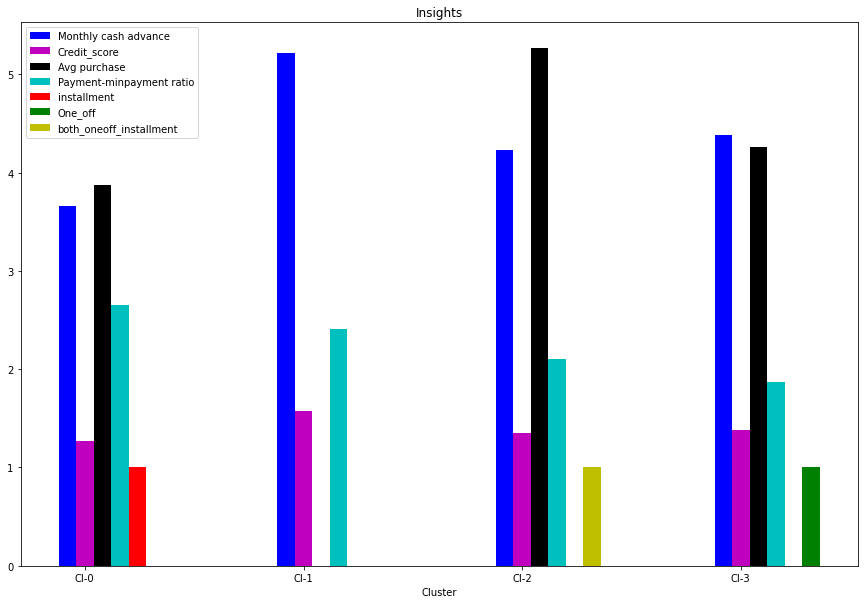

In [86]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values+1)
credit_score=(cluster_4.loc['limit_usage',:].values+1)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values+1)
payment=np.log(cluster_4.loc['payment_minpayment',:].values+1)
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values
both=cluster_4.loc['both_oneoff_installment',:].values



bar_width=.08
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off',width=bar_width)
b6=plt.bar(index+5*bar_width,both,color='y',label='both_oneoff_installment',width=bar_width)


plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

##### Insights with 4 Clusters

- Cluster 0 customers have good credit score,doing maximum one off transactions,have least payment minpayment ratio,take high cash advance

- Cluster 1 customers take least monthly cash advance,have lowest credit score, have highest payment minpayment ratio, doing maximum installment transactions

- Cluster 2 customers have highest monthly purchase and do the highest one off and installment transaction and have good credit score

- Cluster 3 customers take highest monthly cash advance, highest credit score and have high payment minpayment ratio

### Marketing Strategy Suggested:

#### a. Group 0

- This group is has minimum paying ratio and using card for just oneoff transactions (may be for utility bills only).We can target them by providing less interest rate on Installment purchase transaction.

#### b. Group 1

- They are potential target customers who are paying dues and doing mostly installment purchases and have poor credit score) -- we can increase credit limit or can lower down interest rate -- Can be given premium card /loyality cards to increase transactions

#### c. Group 2

- This group is performing best among all as cutomers are maintaining good credit score, doing both one off and instalment purchase,highest monthly average purchase and paying dues on time. -- Giving rewards point will make them perform more purchases.

#### d. Group 3

- They have good credit score and taking only cash on advance. We can target them by providing less interest rate on Installment purchase transaction or cashback/discount on one off purchase transaction.

In [87]:
# Percentage of each cluster in the total customer base
s=cluster_df_4.groupby('Cluster_4').apply(lambda x: x['Cluster_4'].value_counts())
print (s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df_4.shape[0])*100,name='Percentage')
print ("Cluster -4 ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')

Cluster_4   
0          0    2259
1          1    2043
2          2    2774
3          3    1874
Name: Cluster_4, dtype: int64 

Cluster -4  

   Size  Percentage
0  2259   25.240223
1  2043   22.826816
2  2774   30.994413
3  1874   20.938547 

